Modèle Udp

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import random
from tensorflow.keras.layers import Dropout
from sklearn.metrics import confusion_matrix,classification_report
from datetime import datetime
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard

In [3]:
df=pd.read_csv('df_pretraite.csv')

In [2]:
# On définit une fonction qui retourne 0 pour un état normal et 1 s'il s'agit d'une attaque
def normal_or_not(state):
    if(state=="normal"):
        return 0
    else:
        return 1

In [4]:
df['attack-type']=df['attack-type'].apply(normal_or_not)

In [5]:
df=df[df['protocol_type']==2]

In [6]:
df.drop(['num_outbound_cmds'],axis=1,inplace=True)

<Axes: xlabel='protocol_type', ylabel='count'>

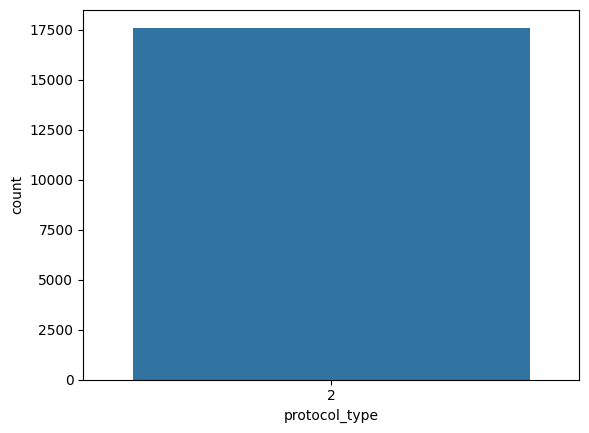

In [7]:
sns.countplot(x='protocol_type',data=df)

In [8]:
X=df.drop('attack-type',axis=1).values
y=df['attack-type'].values

In [9]:
X_train, X_test, y_train,y_test= train_test_split(X, y, test_size=0.2, random_state=101)

In [10]:
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [12]:
X_test.shape

(3523, 40)

In [13]:
early_stop=EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)
log_directory='logs\\fit'
timestamp=datetime.now().strftime("%Y-%m-%d--%H%M")
log_directory=log_directory+'\\'+timestamp
board= TensorBoard(log_dir=log_directory,histogram_freq=1,write_graph=True, write_images=True, update_freq='epoch',profile_batch=2,embeddings_freq=1)

In [14]:
# udp
model=Sequential()
model.add(Dense(40, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(20, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

In [15]:
model.fit(x=X_train,y=y_train,epochs=300, batch_size=256, validation_data=(X_test,y_test),callbacks=[early_stop,board])

Epoch 1/300
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.7101 - loss: 0.5773 - val_accuracy: 0.8076 - val_loss: 0.3234
Epoch 2/300
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8271 - loss: 0.3394 - val_accuracy: 0.9307 - val_loss: 0.2234
Epoch 3/300
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9056 - loss: 0.2500 - val_accuracy: 0.9591 - val_loss: 0.1432
Epoch 4/300
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9356 - loss: 0.1697 - val_accuracy: 0.9586 - val_loss: 0.1123
Epoch 5/300
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9437 - loss: 0.1471 - val_accuracy: 0.9594 - val_loss: 0.1045
Epoch 6/300
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9531 - loss: 0.1348 - val_accuracy: 0.9631 - val_loss: 0.1020
Epoch 7/300
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9544 - loss: 0.1232 - val_accuracy: 0.9645 - val_loss: 0.0985
Epoch 8/300
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9581 - loss: 0.1212 - val_accuracy: 0.9676 

In [16]:
losses_udp=pd.DataFrame(model.history.history)

In [17]:
epoch_udp=len(losses_udp)

<Axes: >

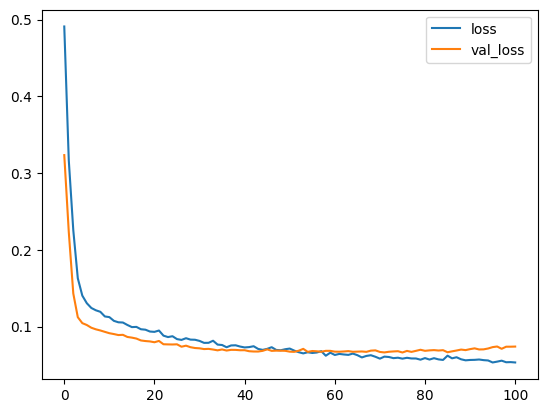

In [18]:
losses_udp[['loss','val_loss']].plot()

<Axes: >

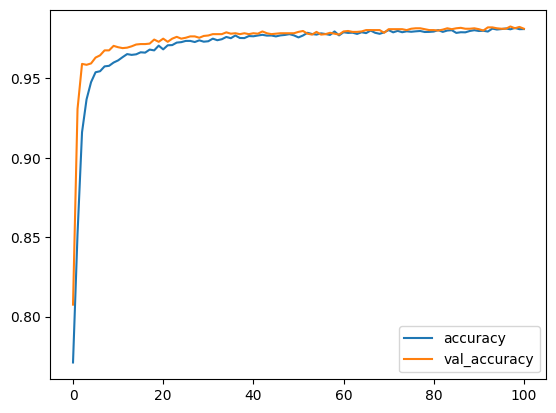

In [19]:
losses_udp[['accuracy','val_accuracy']].plot()

In [20]:
predictions_udp=(model.predict(X_test)>0.5).astype('int32')

111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [25]:
print(classification_report(y_test,predictions_udp))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2840
           1       0.95      0.95      0.95       683

    accuracy                           0.98      3523
   macro avg       0.97      0.97      0.97      3523
weighted avg       0.98      0.98      0.98      3523



In [21]:
confusion_matrix(y_test,predictions_udp)

array([[2808,   32],
       [  34,  649]])

In [22]:
model.save('MUdp.h5')
model.save('MUdp.keras')

In [23]:
from joblib import dump

In [24]:
dump(scaler,'scaler_MUdp.pkl')

['scaler_MUdp.pkl']